In [5]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

In [6]:
print(df.head())
print(df.tail())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


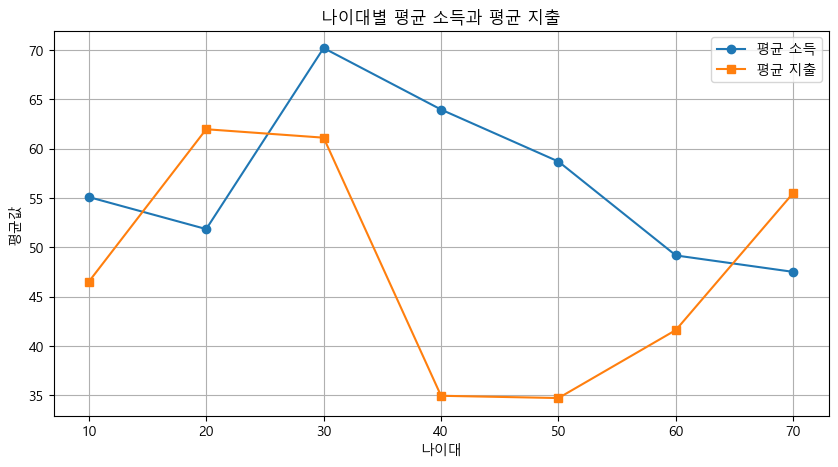

In [ ]:
import matplotlib.pyplot as plt

# 나이대(10대, 20대, 30대, ...) 컬럼 생성
df['나이대'] = (df['Age'] // 10) * 10

# 나이대별 평균 소득과 평균 지출 계산
age_group_stats = df.groupby('나이대')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()
plt.rc('font', family='Malgun Gothic')
# 그래프
plt.figure(figsize=(10,5))
plt.plot(age_group_stats['나이대'], age_group_stats['Annual Income (k$)'], marker='o', label='평균 소득')
plt.plot(age_group_stats['나이대'], age_group_stats['Spending Score (1-100)'], marker='s', label='평균 지출')
plt.xlabel('나이대')
plt.ylabel('평균값')
plt.title('나이대별 평균 소득과 평균 지출')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', '나이대'],
      dtype='object')

    Gender  나이대  Annual Income (k$)  Spending Score (1-100)
0   Female   10           64.333333               50.666667
1   Female   20           49.076923               61.500000
2   Female   30           66.243243               62.378378
3   Female   40           61.750000               33.541667
4   Female   50           58.142857               37.071429
5   Female   60           52.500000               48.500000
6     Male   10           52.000000               45.111111
7     Male   20           56.058824               62.647059
8     Male   30           76.250000               59.125000
9     Male   40           67.466667               37.200000
10    Male   50           59.363636               31.727273
11    Male   60           46.500000               36.100000
12    Male   70           47.500000               55.500000


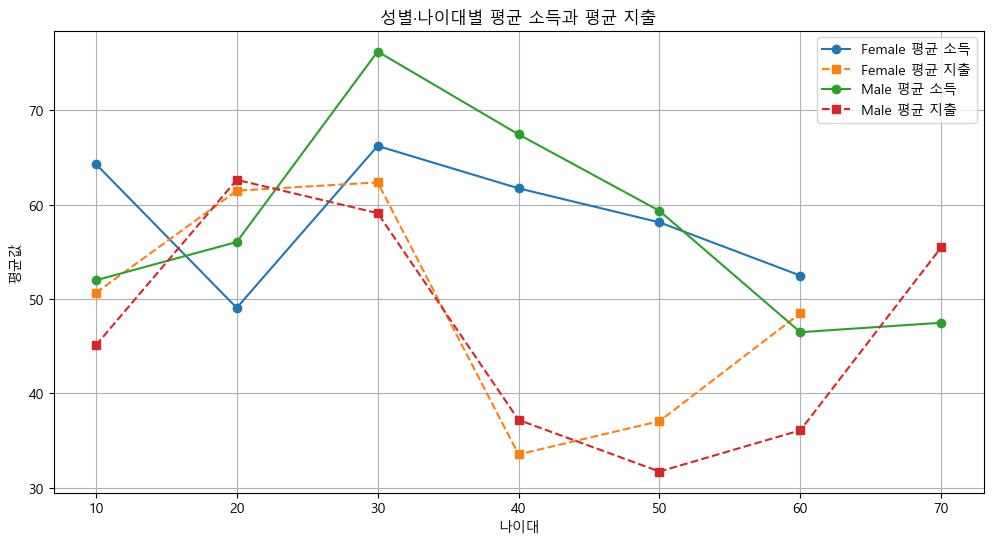

In [10]:
import matplotlib.pyplot as plt

# 성별과 나이대별로 평균 소득과 평균 지출 계산
gender_age_stats = df.groupby(['Gender', '나이대'])[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

print(gender_age_stats)

# 시각화: 성별별로 나이대별 평균 소득과 평균 지출 라인그래프
plt.figure(figsize=(12,6))
for gender in gender_age_stats['Gender'].unique():
    subset = gender_age_stats[gender_age_stats['Gender'] == gender]
    plt.plot(subset['나이대'], subset['Annual Income (k$)'], marker='o', label=f'{gender} 평균 소득')
    plt.plot(subset['나이대'], subset['Spending Score (1-100)'], marker='s', linestyle='--', label=f'{gender} 평균 지출')

plt.xlabel('나이대')
plt.ylabel('평균값')
plt.title('성별·나이대별 평균 소득과 평균 지출')
plt.legend()
plt.grid(True)
plt.show()

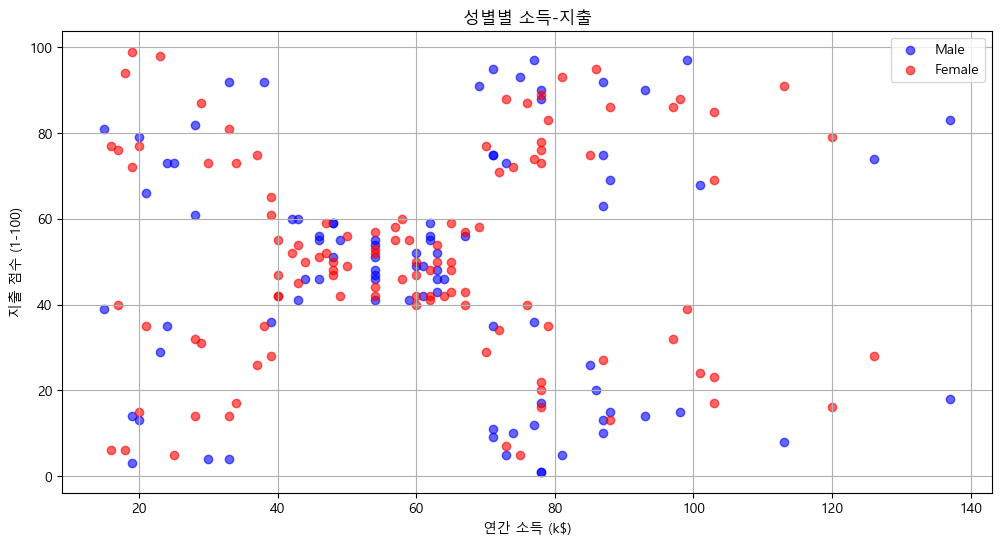

In [ ]:

import matplotlib.pyplot as plt

# 산점도로 성별, 나이대별 소득과 지출 시각화
plt.figure(figsize=(12,6))
colors = {'Male': 'blue', 'Female': 'red'}

for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        alpha=0.6,
        label=gender,
        c=colors[gender]
    )

plt.xlabel('연간 소득 (k$)')
plt.ylabel('지출 점수 (1-100)')
plt.title('성별별 소득-지출')
plt.legend()
plt.grid(True)
plt.show()
